In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# 1. Make Data

In [2]:
# these we know now. but will try to find out through DL
weights = 0.73
bias = 0.48


In [3]:
X = torch.arange(3, 204,4)
y = weights*X+ bias


In [4]:
noise = torch.rand(X.shape)

In [5]:
# X = X + noise*0.4

In [6]:
test_size = .8
test_idx = int(len(X)*test_size)
test_idx

40

In [7]:
xtrain,xtest = X[:test_idx], X[test_idx:]
ytrain,ytest = y[:test_idx], y[test_idx:]


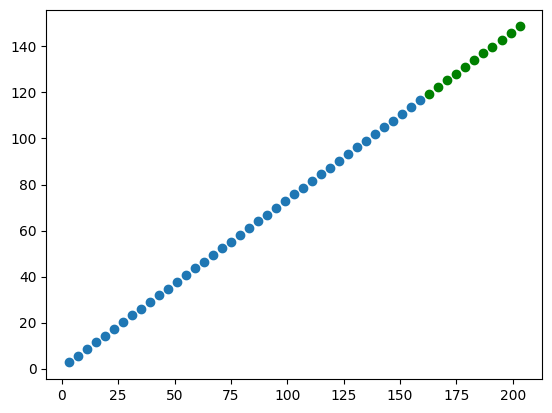

In [8]:
plt.scatter(x=xtrain, y=ytrain)
plt.scatter(x=xtest, y=ytest, color = 'green')

# 2. Build Model

In [9]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [10]:
torch.manual_seed(42)
model = LinearRegression()

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
ypred = model(xtest)
ypred

tensor([55.0093, 56.3561, 57.7029, 59.0496, 60.3964, 61.7431, 63.0899, 64.4367,
        65.7834, 67.1302, 68.4770], grad_fn=<AddBackward0>)

In [14]:
with torch.no_grad():
    ypred = model(xtest)

ypred

tensor([55.0093, 56.3561, 57.7029, 59.0496, 60.3964, 61.7431, 63.0899, 64.4367,
        65.7834, 67.1302, 68.4770])

In [15]:
with torch.inference_mode():
    ypred = model(xtest)

ypred

tensor([55.0093, 56.3561, 57.7029, 59.0496, 60.3964, 61.7431, 63.0899, 64.4367,
        65.7834, 67.1302, 68.4770])

In [16]:
def plot_prediction(x:torch.tensor):
    plt.grid()
    plt.scatter(x=xtrain, y=ytrain, label='train')
    plt.scatter(x=xtest, y=ytest, color = 'red', label = 'test')
    plt.scatter(x=xtest, y=x, color = 'yellow', label = 'pred', alpha=.7)
    plt.legend()

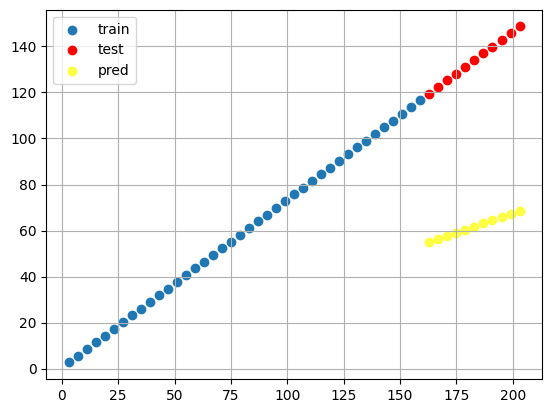

In [17]:
plot_prediction(ypred)

In [18]:
# loss function
loss_fn = torch.nn.L1Loss()

In [19]:
# Optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr= 0.00001)

# Training Loop

In [20]:
losses = []
test_losses = []

In [21]:
epoch = 1000



for i in range(epoch):


    # get logits
    ypred = model(xtrain)

    # calculate loss
    loss = loss_fn(ypred, ytrain)

    losses.append(loss)
    # reset optimizer
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # testing
    with torch.inference_mode():
        ypred = model(xtest)
        test_loss = loss_fn(ypred, ytest)
        test_losses.append(test_loss)

    if i % 10 ==0:
        print(f'{i:3} |  Loss: {loss:20}  | test_loss: {test_loss}')

  0 |  Loss:    32.20927047729492  | test_loss: 72.1786117553711
 10 |  Loss:   31.553075790405273  | test_loss: 70.69622039794922
 20 |  Loss:    30.89687728881836  | test_loss: 69.21382141113281
 30 |  Loss:   30.240680694580078  | test_loss: 67.73143768310547
 40 |  Loss:   29.584482192993164  | test_loss: 66.24903869628906
 50 |  Loss:    28.92828369140625  | test_loss: 64.76663970947266
 60 |  Loss:   28.272085189819336  | test_loss: 63.284244537353516
 70 |  Loss:   27.615886688232422  | test_loss: 61.801856994628906
 80 |  Loss:   26.959692001342773  | test_loss: 60.319454193115234
 90 |  Loss:   26.303491592407227  | test_loss: 58.837059020996094
100 |  Loss:   25.647296905517578  | test_loss: 57.35466384887695
110 |  Loss:   24.991100311279297  | test_loss: 55.87226867675781
120 |  Loss:    24.33489990234375  | test_loss: 54.389869689941406
130 |  Loss:   23.678701400756836  | test_loss: 52.907474517822266
140 |  Loss:   23.022502899169922  | test_loss: 51.425086975097656
150 

In [22]:
weights, bias

(0.73, 0.48)

In [23]:
with torch.inference_mode():
    ypred = model(xtest)

ypred

tensor([119.6182, 122.5503, 125.4824, 128.4144, 131.3465, 134.2786, 137.2107,
        140.1428, 143.0749, 146.0069, 148.9390])

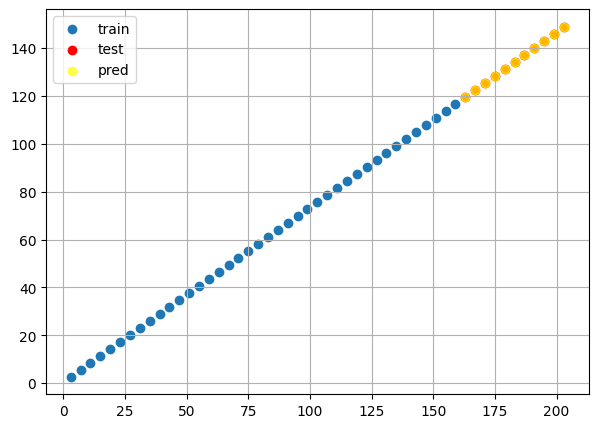

In [24]:
plt.figure(figsize=(7, 5))
plot_prediction(ypred)


In [25]:
losses_np = np.array([i.detach().numpy() for i in losses])
test_losses_np = np.array([i.detach().numpy() for i in test_losses])

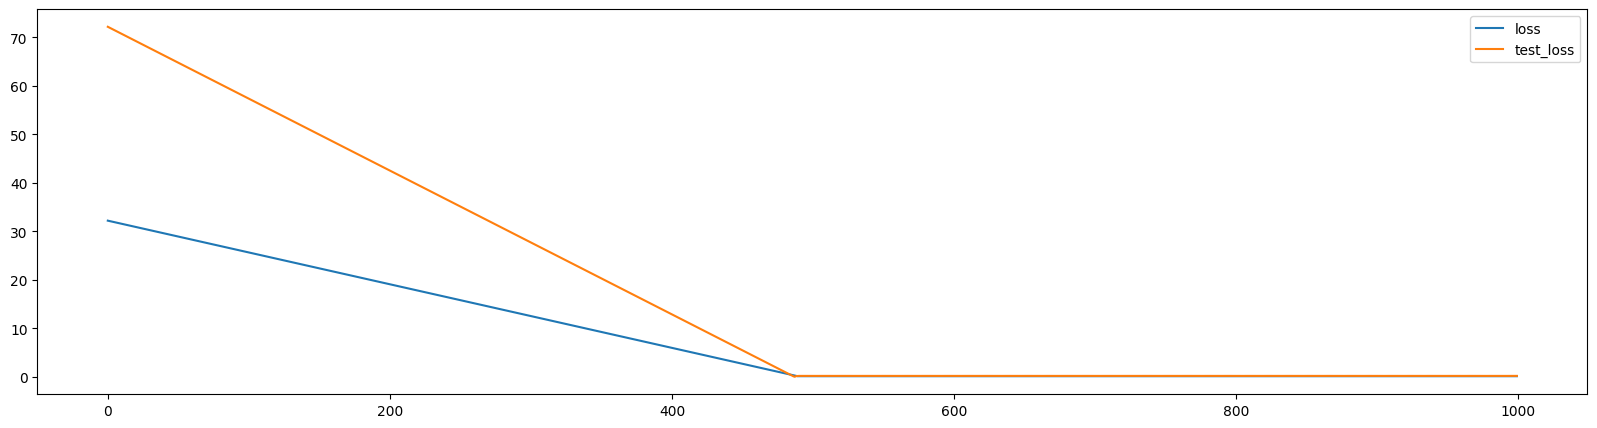

In [26]:
plt.figure(figsize =(20,5))
plt.plot(losses_np, label = 'loss')
plt.plot(test_losses_np, label = 'test_loss')
plt.legend()

# Saving the Model

In [27]:
from pathlib import Path

In [28]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = Path('model0.pth')

MODEL_SAVEPATH = MODEL_PATH / MODEL_NAME
MODEL_SAVEPATH

PosixPath('models/model0.pth')

In [29]:
torch.save(obj=model.state_dict(), f = MODEL_SAVEPATH)

In [30]:
!ls models ; du -h models/

model0.pth
8.0K	models/


# Loading saved model state

In [31]:
loaded_model = LinearRegression()

In [32]:
# randomized state 
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [33]:
# loading state dict
loaded_model.load_state_dict(torch.load(f=MODEL_SAVEPATH))

<All keys matched successfully>

In [34]:
# WE LOADED saved state
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7330])), ('bias', tensor([0.1358]))])

In [35]:
# loaded model state should math initial model we trained
model.state_dict()

OrderedDict([('weights', tensor([0.7330])), ('bias', tensor([0.1358]))])

In [36]:
# predict  with loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_ypred = loaded_model(xtest)

loaded_ypred

tensor([119.6182, 122.5503, 125.4824, 128.4144, 131.3465, 134.2786, 137.2107,
        140.1428, 143.0749, 146.0069, 148.9390])

In [37]:
loaded_ypred == ypred 

tensor([True, True, True, True, True, True, True, True, True, True, True])

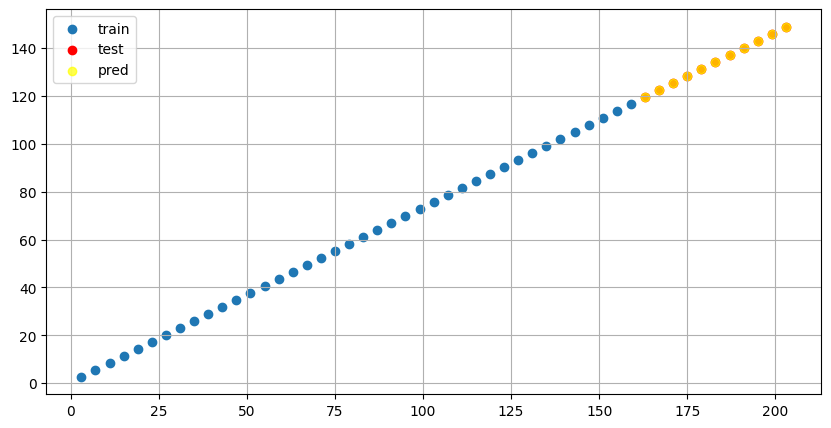

In [38]:
plt.figure(figsize=(10, 5))
plot_prediction(loaded_ypred)

# 3. Build Model V2

In [39]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features = 1, out_features=1)

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [40]:
torch.manual_seed(42)
model1 = LinearRegressionV2()

In [41]:
list(model1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [42]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [43]:
next(model1.parameters()).device

device(type='cpu')

### Changing Device

In [44]:
device='gpu' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [45]:
model1.to(device)

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
model1.state_dict()['linear_layer.weight'].dtype

torch.float32

In [47]:
print(xtrain.shape, xtrain.dtype)
print(xtest.shape, xtest.dtype)

torch.Size([40]) torch.int64
torch.Size([11]) torch.int64


In [48]:
xtrain = xtrain.unsqueeze(1)
xtest = xtest.unsqueeze(1)
xtrain.shape, xtest.shape

(torch.Size([40, 1]), torch.Size([11, 1]))

In [49]:
xtrain= xtrain.type(torch.float32)
xtest= xtest.type(torch.float32)
xtrain.dtype, xtest.dtype

(torch.float32, torch.float32)

In [50]:
xtest.shape

torch.Size([11, 1])

In [51]:
ypred1 = model1(xtest)
ypred1

tensor([[125.4498],
        [128.5079],
        [131.5661],
        [134.6242],
        [137.6824],
        [140.7406],
        [143.7987],
        [146.8569],
        [149.9150],
        [152.9732],
        [156.0313]], grad_fn=<AddmmBackward0>)

In [52]:
with torch.inference_mode():
    ypred1 = model1(xtest)

ypred1

tensor([[125.4498],
        [128.5079],
        [131.5661],
        [134.6242],
        [137.6824],
        [140.7406],
        [143.7987],
        [146.8569],
        [149.9150],
        [152.9732],
        [156.0313]])

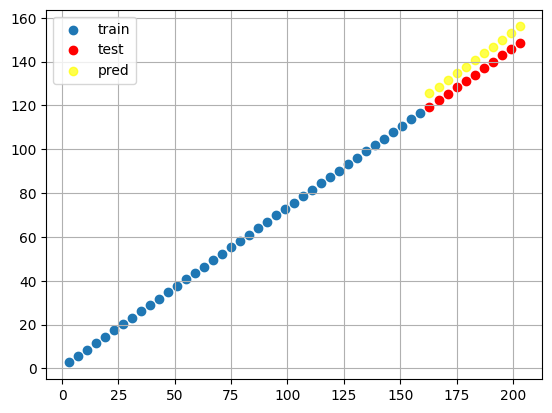

In [53]:
plot_prediction(ypred1)

In [54]:
# loss function
loss_fn = torch.nn.L1Loss()

In [55]:
# Optimizer
optimizer = torch.optim.SGD(params = model1.parameters(), lr= 0.00001)

# Training Loop

In [56]:
xtrain.shape

torch.Size([40, 1])

In [57]:
losses = []
test_losses = []

In [58]:
ytrain1 = ytrain.unsqueeze(1)
ytest1 = ytest.unsqueeze(1)

ytrain1.shape, ytest1.shape

(torch.Size([40, 1]), torch.Size([11, 1]))

In [59]:
epoch = 1000



for i in range(epoch):


    # get logits
    ypred = model1(xtrain)

    # calculate loss
    loss = loss_fn(ypred, ytrain1)

    losses.append(loss)
    # reset optimizer
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # testing
    with torch.inference_mode():
        ypred = model1(xtest)
        test_loss = loss_fn(ypred, ytest1)
        test_losses.append(test_loss)

    if i % 10 ==0:
        print(f'{i:3} |  Loss: {loss:20}  | test_loss: {test_loss}')

  0 |  Loss:    3.147627115249634  | test_loss: 6.522314071655273
 10 |  Loss:   2.4914050102233887  | test_loss: 5.039859294891357
 20 |  Loss:   1.8351831436157227  | test_loss: 3.5574166774749756
 30 |  Loss:   1.1789586544036865  | test_loss: 2.074960231781006
 40 |  Loss:   0.5227370262145996  | test_loss: 0.5925071239471436
 50 |  Loss:  0.14349408447742462  | test_loss: 0.21360015869140625
 60 |  Loss:   0.1434962898492813  | test_loss: 0.21274913847446442
 70 |  Loss:  0.14347438514232635  | test_loss: 0.2118981033563614
 80 |  Loss:  0.14345243573188782  | test_loss: 0.2110394537448883
 90 |  Loss:   0.1434307098388672  | test_loss: 0.21018843352794647
100 |  Loss:  0.14340780675411224  | test_loss: 0.20933741331100464
110 |  Loss:   0.1433854103088379  | test_loss: 0.20847944915294647
120 |  Loss:  0.14336377382278442  | test_loss: 0.2076270431280136
130 |  Loss:   0.1433410942554474  | test_loss: 0.20677809417247772
140 |  Loss:  0.14331819117069244  | test_loss: 0.205913200

In [60]:
weights, bias

(0.73, 0.48)

In [61]:
with torch.inference_mode():
    ypred1 = model1(xtest)

ypred1

tensor([[119.3222],
        [122.2301],
        [125.1380],
        [128.0459],
        [130.9538],
        [133.8617],
        [136.7696],
        [139.6775],
        [142.5854],
        [145.4933],
        [148.4011]])

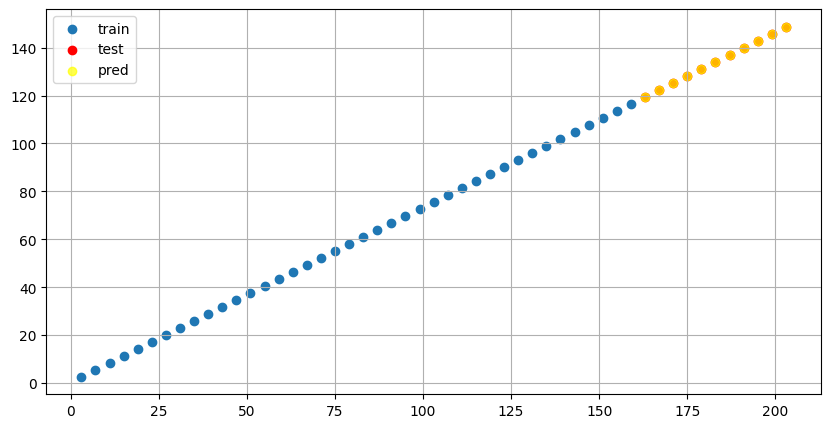

In [62]:
plt.figure(figsize=(10, 5))
plot_prediction(ypred1)

In [63]:
losses_np = np.array([i.detach().numpy() for i in losses])
test_losses_np = np.array([i.detach().numpy() for i in test_losses])

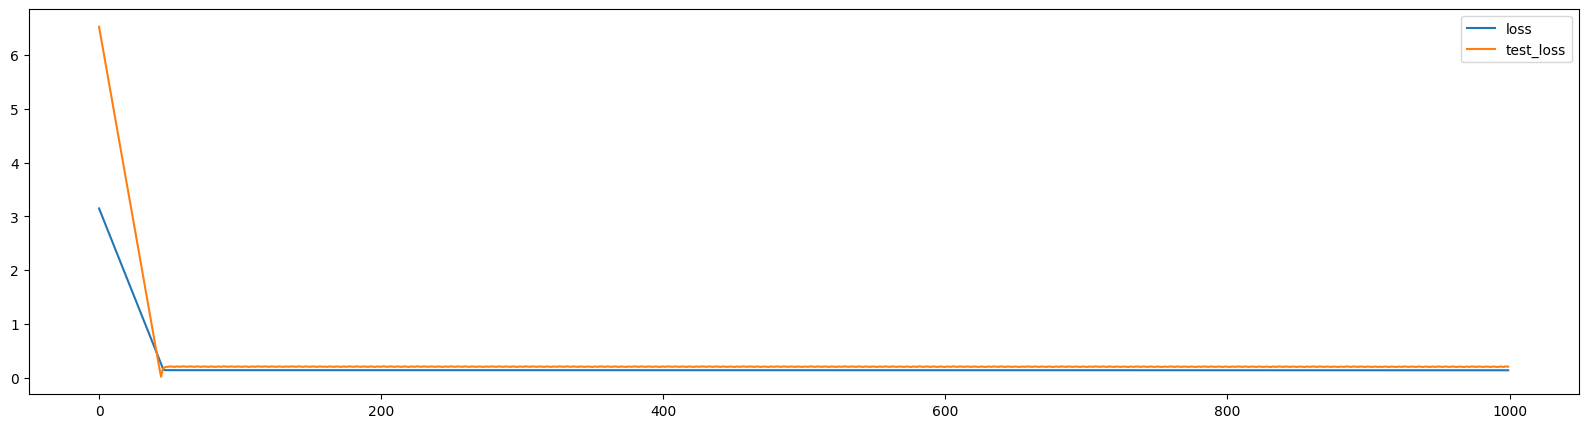

In [64]:
plt.figure(figsize =(20,5))
plt.plot(losses_np, label = 'loss')
plt.plot(test_losses_np, label = 'test_loss')
plt.legend()

In [65]:
# since model is performing well the parameters should be near equal to know paramter
print(model1.state_dict())
print(weights, bias)

OrderedDict([('linear_layer.weight', tensor([[0.7270]])), ('linear_layer.bias', tensor([0.8256]))])
0.73 0.48


you may see that bias is no way close to model bias. Why? 


130 * .7 >> .8 

since magnitude of weights * input is  quite big and  a little error in calculating bias is tolerable.